In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import wasserstein_distance
from sklearn.metrics import mean_absolute_error

In [8]:
df = pd.read_excel("Measurement_data/genodrawing_validation_data.xlsx",index_col=0)
df

,FSI_Real_Mean,FSI_GT,FSI_targeted,FSI_random,SR_Real_Mean,SR_GT,SR_targeted,SR_random
Name,,,,,,,,
image 1,0.941375,0.982301,0.855856,0.743363,1.154095,1.182037,1.088889,1.086957
image 2,0.744400,0.740741,0.842593,0.723214,1.044172,1.044444,1.113636,1.106383
image 3,0.755366,0.784810,0.740000,0.752381,1.156190,1.125434,1.097561,1.166667
image 4,0.719188,0.740000,0.846939,0.756757,1.001029,1.050298,1.125000,1.108909
image 5,0.783215,0.803922,0.785714,0.828283,1.160009,1.230632,1.097561,1.183801
image 6,0.829614,0.865979,0.848485,0.761468,1.127989,1.097340,1.143105,1.219512
image 7,0.751766,0.754386,0.769231,0.743363,1.123753,1.143586,1.200000,1.106588
image 8,0.768849,0.806452,0.808081,0.728070,1.129997,1.102862,1.073448,1.081633
image 9,0.837627,0.847458,0.809091,0.745098,1.184651,1.127660,1.113349,1.119301


In [9]:

print("FSIE between targeted and GT: ",mean_absolute_error(df["FSI_targeted"],df["FSI_GT"]))
print("Cone between targeted and GT: ",mean_absolute_error(df["SR_targeted"],df["SR_GT"]))
print("FSIE between random and GT: ",mean_absolute_error(df["FSI_random"],df["FSI_GT"]))
print("Cone between random and GT: ",mean_absolute_error(df["SR_random"],df["SR_GT"]))

FSIE between targeted and GT:  0.038683613926831256
Cone between targeted and GT:  0.058256793911915884
FSIE between random and GT:  0.06508808390220776
Cone between random and GT:  0.060364960549117615


In [10]:
fsie_mape = []
sr_mape = []
fsies_val = df["FSI_GT"].values
shoulder_ratio_val = df["SR_GT"].values
for i in range(10000):
    np.random.seed(i)
    fsie_mape.append(mean_absolute_error(fsies_val,
                                                    np.random.normal(loc=np.mean(fsies_val),scale=np.std(fsies_val),size=36)))
    sr_mape.append(mean_absolute_error(shoulder_ratio_val,np.random.normal(loc=np.mean(shoulder_ratio_val),scale=np.std(shoulder_ratio_val),size=36)))
print(np.mean(fsie_mape))
print(np.std(fsie_mape))
print(np.mean(sr_mape))
print(np.std(sr_mape))

0.07479821236867654
0.008279049396110096
0.06819345990815842
0.007525838924019576


In [11]:
def categorize_ecpgr(FSIE):
    if FSIE >= 1.05:
        return "Oval"
    elif FSIE >= 0.95:
        return "Oblong"

    elif FSIE >= 0.85:
        return "Globose"

    elif FSIE >= 0.75:
        return "Flat-Globose"

    else:
        return "Flat"

In [12]:
df_fsi = df.loc[:,["FSI_targeted","FSI_random","FSI_GT"]]
Cat_targeted = df_fsi["FSI_targeted"].apply(categorize_ecpgr)
Cat_random = df_fsi["FSI_random"].apply(categorize_ecpgr)
Cat_GT = df_fsi["FSI_GT"].apply(categorize_ecpgr)

In [13]:
from sklearn.metrics import accuracy_score,f1_score
print("Accuracy of targeted: ",accuracy_score(Cat_GT,Cat_targeted))
print("F1 score of targeted: ",f1_score(Cat_GT,Cat_targeted,average="weighted"))
print("Accuracy of random: ",accuracy_score(Cat_GT,Cat_random))
print("F1 score of random: ",f1_score(Cat_GT,Cat_random,average="weighted"))

Accuracy of targeted:  0.6111111111111112
F1 score of targeted:  0.5936026936026937
Accuracy of random:  0.3888888888888889
F1 score of random:  0.3412698412698413


FSI_GT        Flat  Flat-Globose  Globose  Oblong
FSI_random                                       
Flat             8            11        3       1
Flat-Globose     4             6        3       0


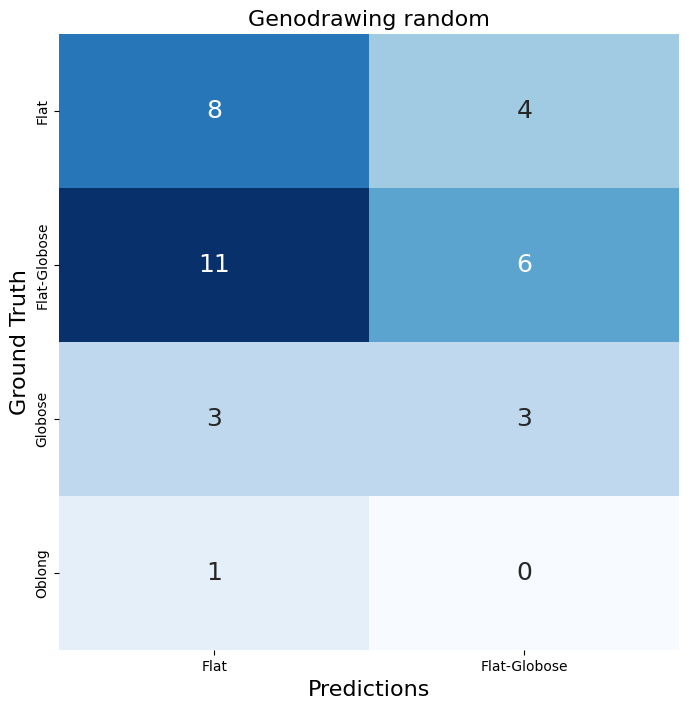

In [14]:

fig = plt.figure(figsize=(8,8))
ax1 = fig.add_subplot(111)
print(pd.crosstab(Cat_random,Cat_GT))
sns.heatmap(pd.crosstab(Cat_GT,Cat_random),
            annot=True,ax=ax1,
            cmap="Blues",
            cbar=False,
            annot_kws = {'size':18})

ax1.set_xlabel("Predictions",fontsize=16)
ax1.set_ylabel("Ground Truth",fontsize=16)
ax1.set_title("Genodrawing random",fontsize=16)
plt.savefig("Figures/confussion_matrix_rand.png")

FSI_GT        Flat  Flat-Globose  Globose  Oblong
FSI_targeted                                     
Flat             7             3        0       0
Flat-Globose     5            13        4       0
Globose          0             1        2       1


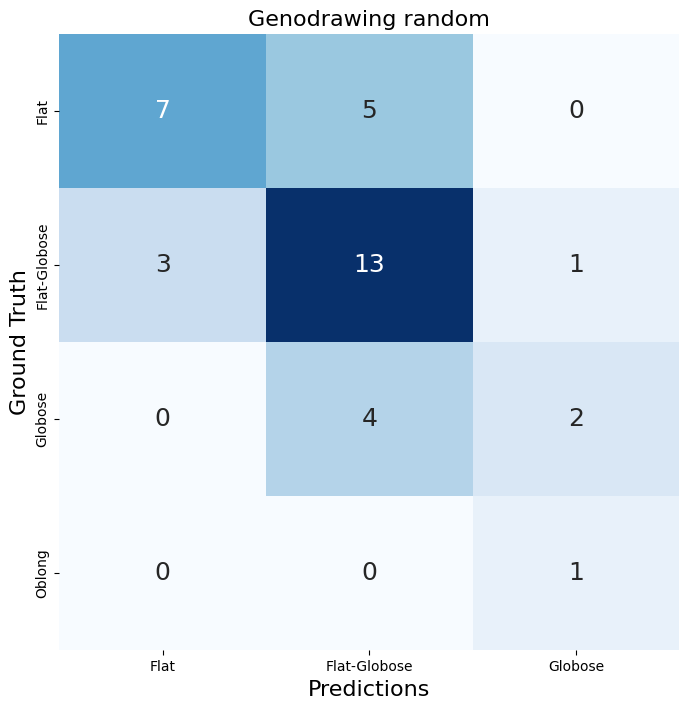

In [15]:
fig = plt.figure(figsize=(8,8))
ax1 = fig.add_subplot(111)
print(pd.crosstab(Cat_targeted,Cat_GT))
sns.heatmap(pd.crosstab(Cat_GT,Cat_targeted),
            annot=True,ax=ax1,
            cmap="Blues",
            cbar=False,
            annot_kws = {'size':18})

ax1.set_xlabel("Predictions",fontsize=16)
ax1.set_ylabel("Ground Truth",fontsize=16)
ax1.set_title("Genodrawing random",fontsize=16)
plt.savefig("Figures/confussion_matrix_targeted.png")

In [16]:
df_fsi = pd.DataFrame({"FSI targeted":df["FSI_targeted"],
                       "FSI random":df["FSI_random"],
                       "FSI decoded mean":df["FSI_GT"],
                      "FSI genotype mean":df["FSI_Real_Mean"]})

df_sr = pd.DataFrame({
                      "SR targeted":df["SR_targeted"],
                      "SR random":df["SR_random"],
                      "SR decoded mean":df["SR_GT"],
                      "SR genotype mean":df["SR_Real_Mean"]
                      })


In [17]:

print("Distance between targeted and Random:" ,wasserstein_distance(df_fsi["FSI targeted"],df_fsi["FSI random"]))
print("Distance between targeted and decoded mean:" ,wasserstein_distance(df_fsi["FSI targeted"],df_fsi["FSI decoded mean"]))
print("Distance between random and decoded mean:",wasserstein_distance(df_fsi["FSI random"],df_fsi["FSI decoded mean"]))
print("Distance between targeted and genotype mean: ",wasserstein_distance(df_fsi["FSI targeted"],df_fsi["FSI genotype mean"]))
print("Distance between random and genotype mean: ",wasserstein_distance(df_fsi["FSI random"],df_fsi["FSI genotype mean"]))
print("Distance between real and genotype mean: ",wasserstein_distance(df_fsi["FSI decoded mean"],df_fsi["FSI genotype mean"]))

Distance between targeted and Random: 0.05050105140127126
Distance between targeted and decoded mean: 0.020912972586581403
Distance between random and decoded mean: 0.04690492769072266
Distance between targeted and genotype mean:  0.02591891317718285
Distance between random and genotype mean:  0.033105684469068725
Distance between real and genotype mean:  0.014445498108649351


In [18]:
print("Distance between targeted and random:" ,wasserstein_distance(df_sr["SR targeted"],df_sr["SR random"]))
print("Distance between targeted and decoded mean:" ,wasserstein_distance(df_sr["SR targeted"],df_sr["SR decoded mean"]))
print("Distance between random and decoded mean:",wasserstein_distance(df_sr["SR random"],df_sr["SR decoded mean"]))
print("Distance between targeted and genotype mean: ",wasserstein_distance(df_sr["SR targeted"],df_sr["SR genotype mean"]))
print("Distance between random and genotype mean: ",wasserstein_distance(df_sr["SR random"],df_sr["SR genotype mean"]))
print("Distance between real and genotype mean: ",wasserstein_distance(df_sr["SR decoded mean"],df_sr["SR genotype mean"]))

Distance between targeted and random: 0.010822197204437063
Distance between targeted and decoded mean: 0.018414745008883092
Distance between random and decoded mean: 0.02470745379481323
Distance between targeted and genotype mean:  0.02552962859537265
Distance between random and genotype mean:  0.023301055884406934
Distance between real and genotype mean:  0.017486556099691214


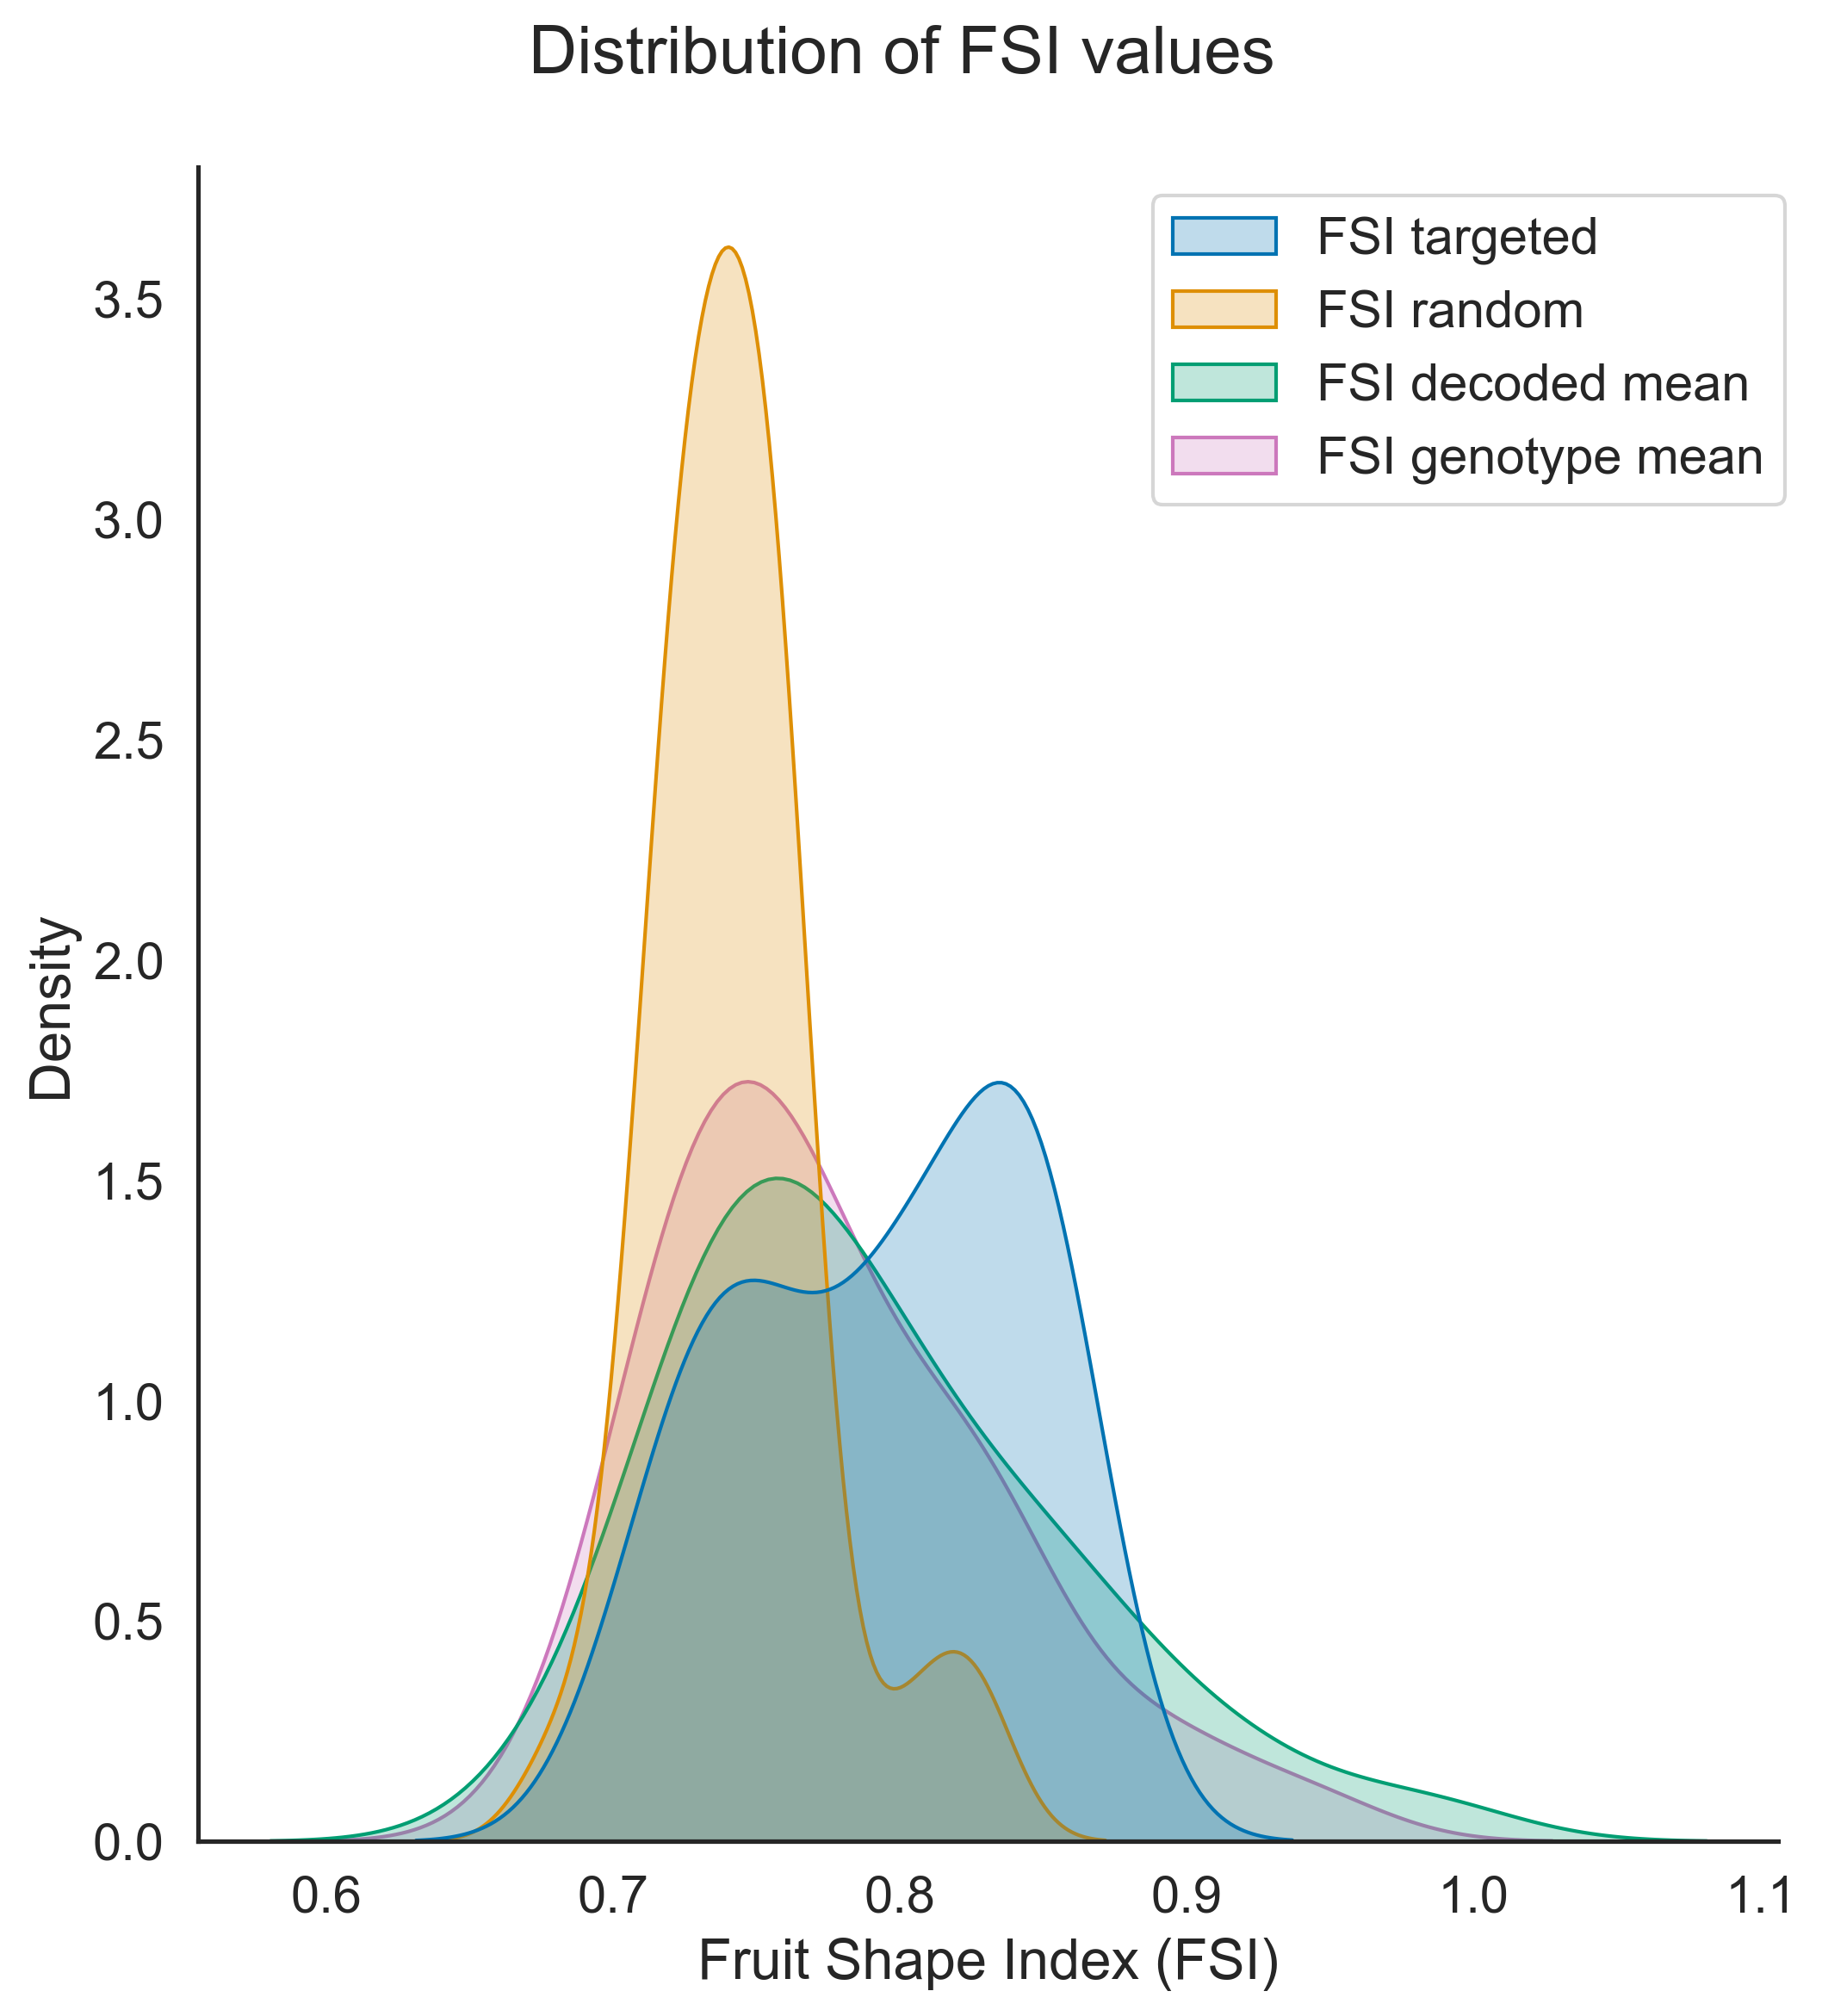

In [19]:
colors = sns.color_palette("colorblind",n_colors=5,desat=1)[0:3]+[sns.color_palette("colorblind",n_colors=5,desat=1)[4]]
sns.set(font_scale=1.3,style="white",palette=colors)

g = sns.displot(df_fsi, kind="kde", height=8, aspect=0.6, fill=True)
g.set_xlabels("Fruit Shape Index (FSI)")
g.fig.suptitle("Distribution of FSI values")
g.fig.tight_layout()
g.fig.set_dpi(300)
sns.move_legend(g, "upper left",bbox_to_anchor = (0.62, 0.91), frameon = True)
#plt.savefig("fsi_distribution_all.png",dpi=300)
g.fig.savefig("Figures/fsi_distribution.png")
plt.show()
plt.close()

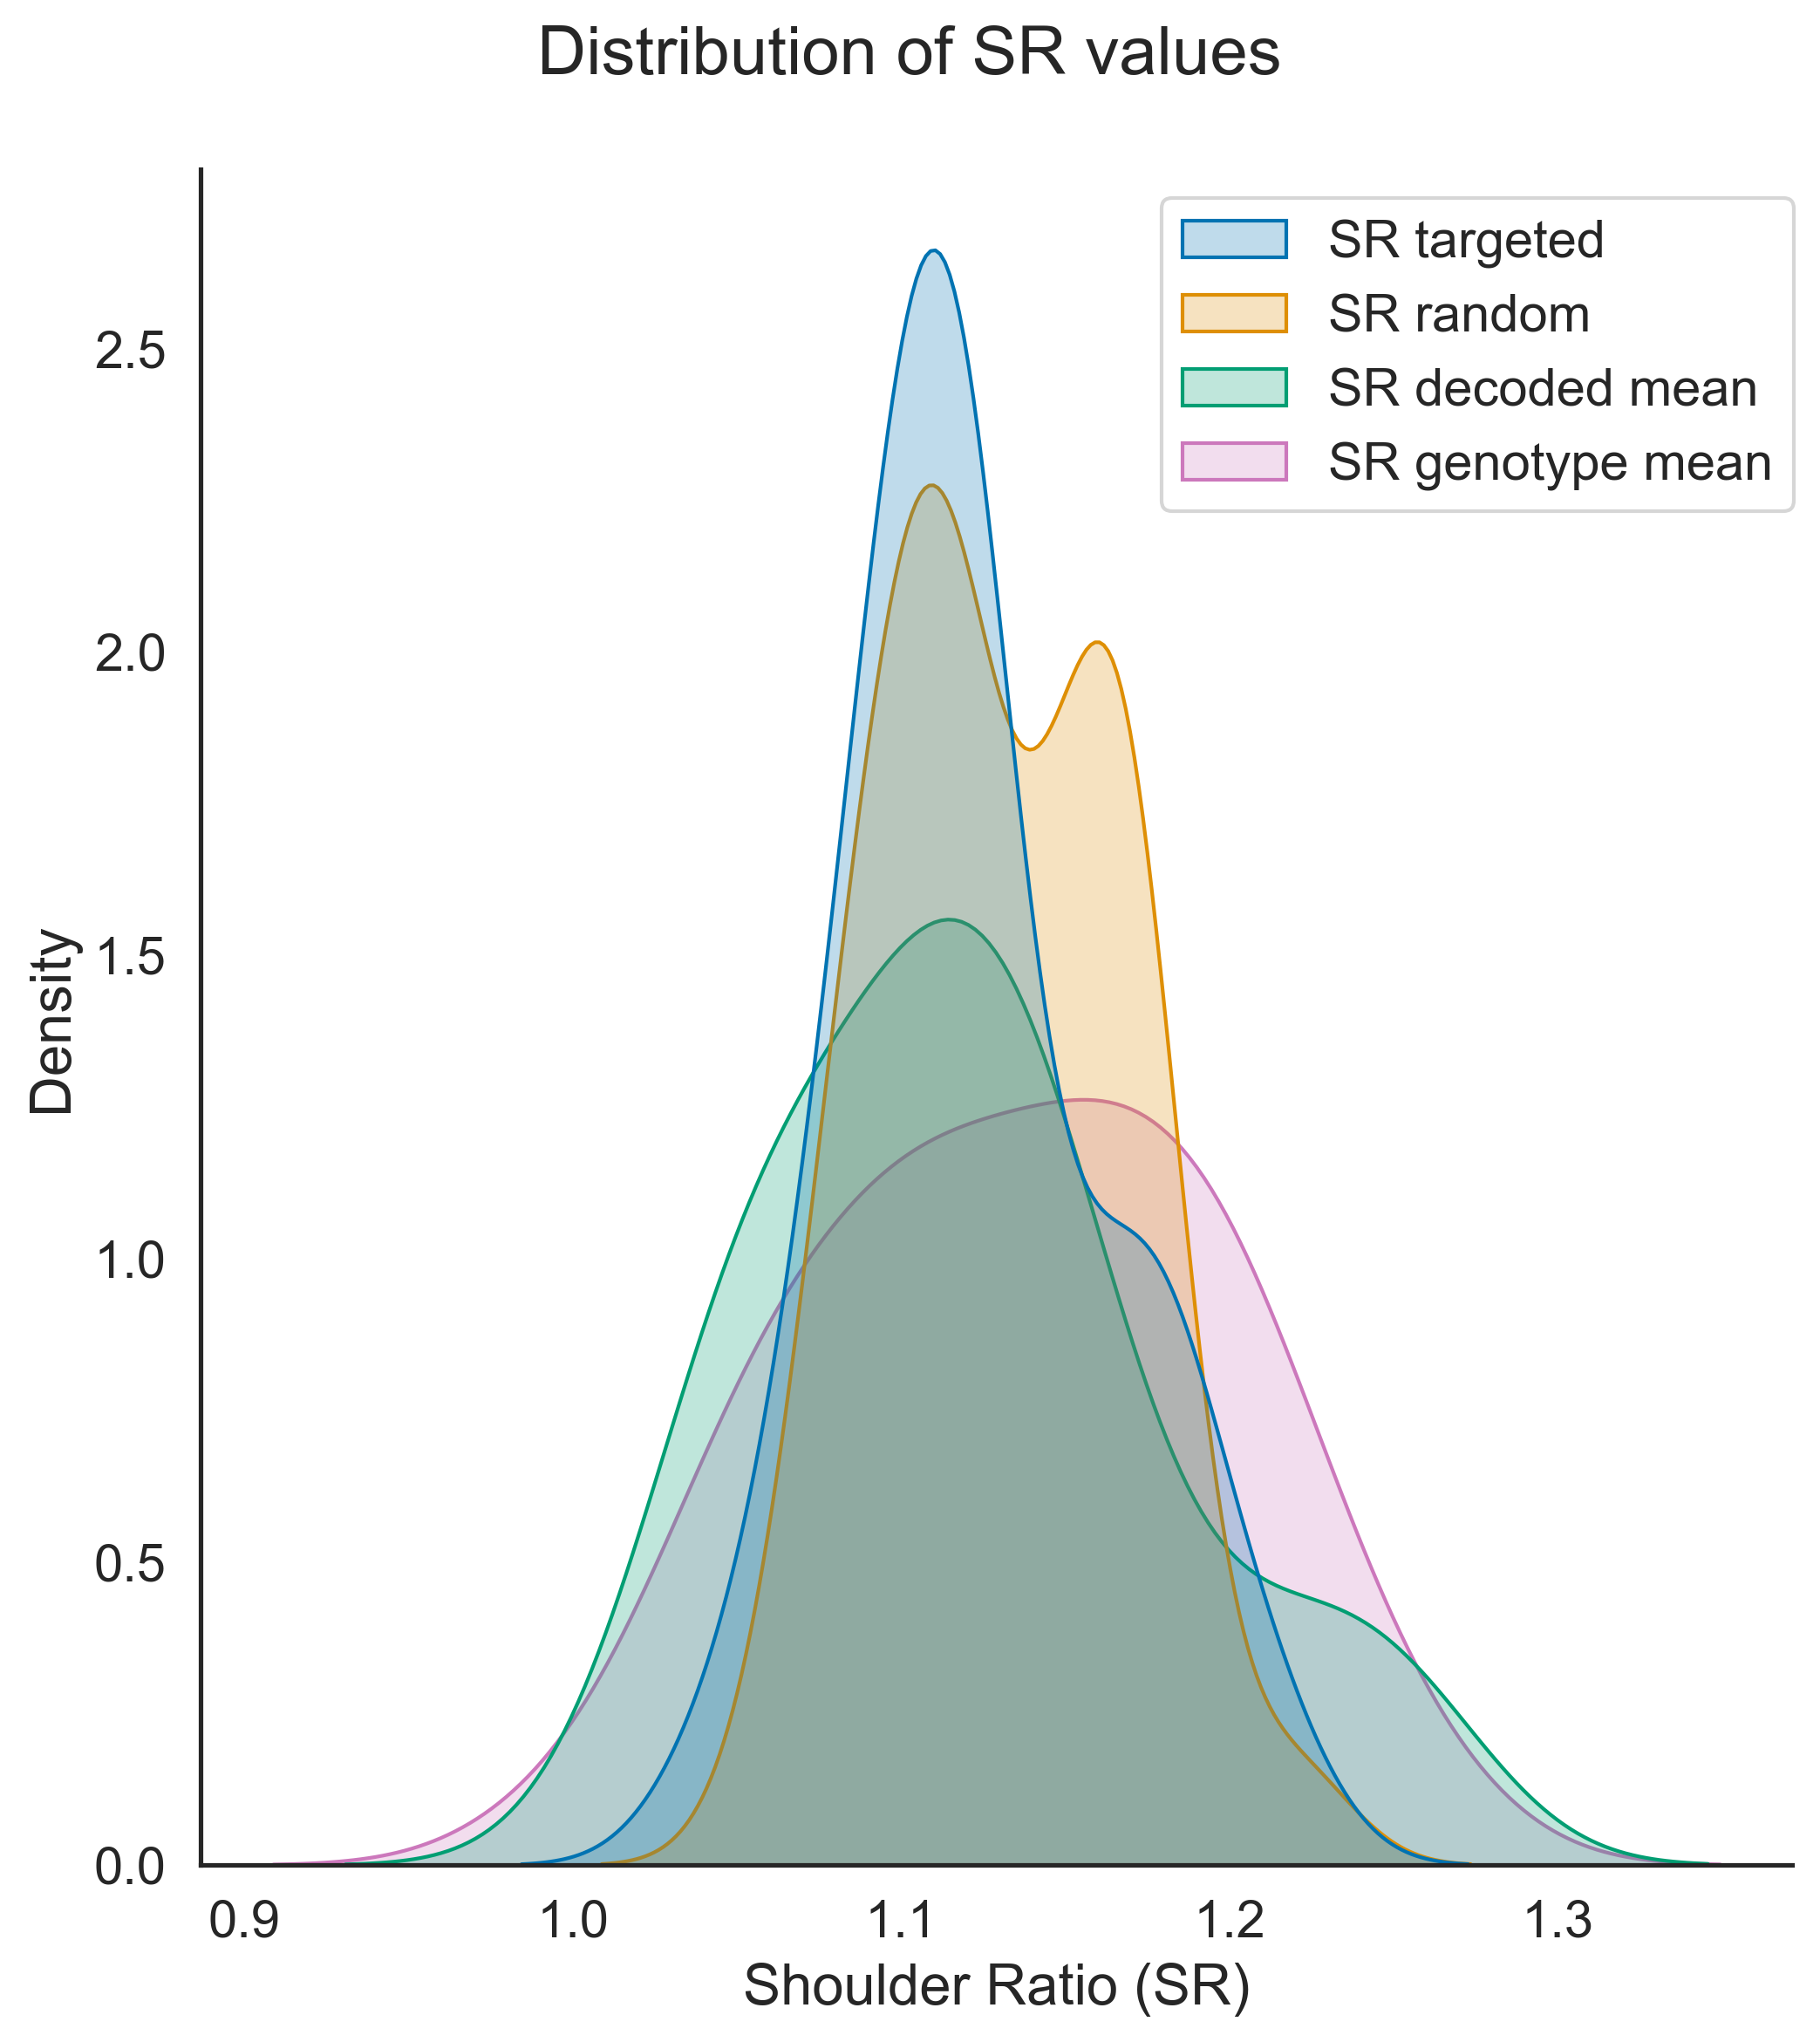

In [20]:
g = sns.displot(df_sr, kind="kde", height=8, aspect=0.6, fill=True)
g.set_xlabels("Shoulder Ratio (SR)")
g.fig.suptitle("Distribution of SR values")
g.fig.tight_layout()
g.fig.set_dpi(300)
sns.move_legend(g, "upper left",bbox_to_anchor = (0.62, 0.91), frameon = True)
g.fig.savefig("Figures/sr_distribution.png")
plt.show()
plt.close()